In [1]:
from scipy import *
import numpy as np
from pylab import *

In [3]:
import fieldize
nval=10000
nbin=10
ndim=2
pos, value, field = rand(nval,ndim)*(nbin-5), ones(nval), zeros(shape=(nbin+1,nbin+1))
x,y=pos.T
ifield=fieldize.cic(pos, value, field, periodic=1)

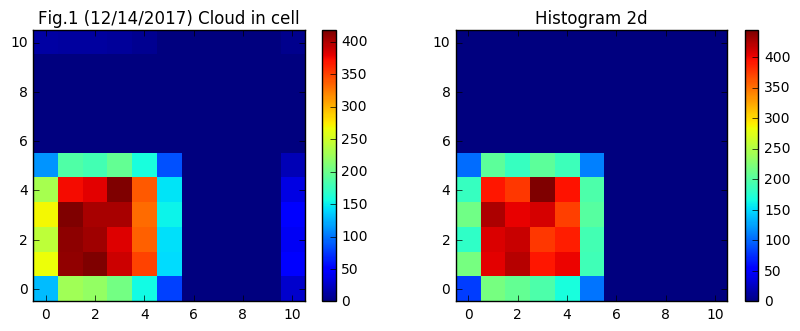

In [14]:
figure(figsize=(10,3.5))
subplot(121)
imshow(ifield,origin='lower',interpolation='nearest')
title('Fig.1 (12/14/2017) Cloud in cell')
colorbar()
subplot(122)
ihist2d=histogram2d(x,y,bins=[arange(-0.5,11),arange(-0.5,11)])[0]
imshow(ihist2d,origin='lower',interpolation='nearest')
title('Histogram 2d')
colorbar()
show()

In [17]:
nudir='/Users/jia/Documents/weaklensing/nubias/'
k512,pk512=load(nudir+'kpk_512grid.npy')
k128,pk128=load(nudir+'kpk_128grid.npy')
k256,pk256=load(nudir+'kpk_256grid.npy')

kful,pkful=genfromtxt('/Users/jia/Documents/weaklensing/kspace_nu/neutrino-batch/matterpower/mnv0.10000_om0.30000_As2.1000/powerspec_tot_066.txt').T
knu,pknu=genfromtxt('/Users/jia/Documents/weaklensing/kspace_nu/neutrino-batch/matterpower/mnv0.10000_om0.30000_As2.1000/powerspec_nu_066.txt').T
fnu=0.1/93.14/0.3/.7**2
pkdm=(sqrt(pkful)-fnu*sqrt(pknu))**2/(1-fnu)**2
ks, ps, Ns = genfromtxt(nudir+'Pk_snapshot_066_idmod_101_0.hdf5_Ng512.txt').T

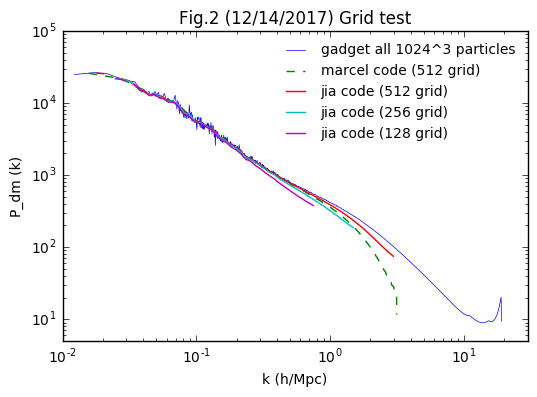

In [26]:
loglog(kful*1e3,pkdm/1e9,'-',lw=0.5, label='gadget all 1024^3 particles')
loglog(ks,ps,'--', label='marcel code (512 grid)')
loglog(k512,pk512, label='jia code (512 grid)')
loglog(k256,pk256, label='jia code (256 grid)')
loglog(k128,pk128, label='jia code (128 grid)')
legend(fontsize=10,frameon=0)
title('Fig.2 (12/14/2017) Grid test')
xlim(1e-2,30)
ylim(5,1e5)
xlabel('k (h/Mpc)')
ylabel('P_dm (k)')
show()

In [83]:
Parr00_z1 = load('Phh/Phh_mnv0.00000_om0.30000_As2.1000_048.npy')
Parr00_z0 = load('Phh/Phh_mnv0.00000_om0.30000_As2.1000_066.npy')

Parr01_z1 = load('Phh/Phh_mnv0.10000_om0.30000_As2.1000_048.npy')
Parr01_z0 = load('Phh/Phh_mnv0.10000_om0.30000_As2.1000_066.npy')

Parr06_z1 = load('Phh/Phh_mnv0.60000_om0.30000_As2.1000_048.npy')
Parr06_z0 = load('Phh/Phh_mnv0.60000_om0.30000_As2.1000_066.npy')

mcut=arange(11.0, 15.5, 0.5)

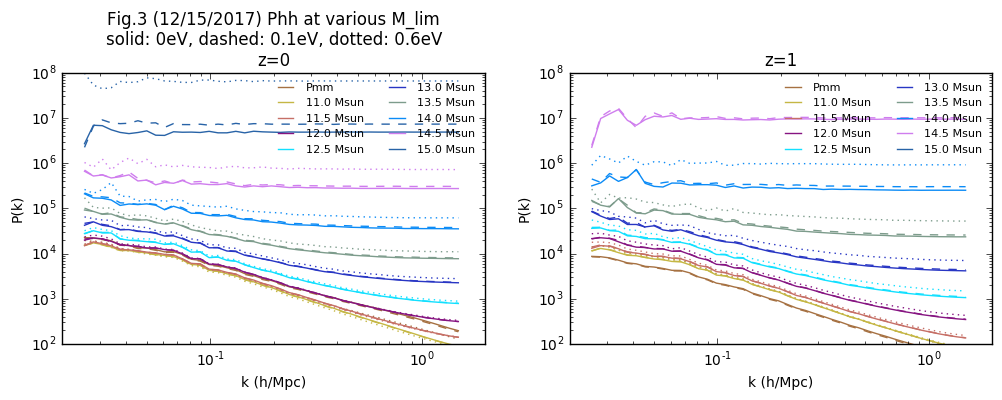

In [86]:
iseed=10025
seed(iseed)
figure(figsize=(12,3.5))
subplot(121)
icolor=rand(3)
loglog(Parr00_z0[0],Parr00_z0[1],'-',color=icolor,label='Pmm')
loglog(Parr01_z0[0],Parr01_z0[1],'--',color=icolor)
loglog(Parr06_z0[0],Parr06_z0[1],':',color=icolor)

i=2
for imcut in mcut:
    i+=1
    icolor=rand(3)
    loglog(Parr00_z0[0],Parr00_z0[i],'-',color=icolor,label='%s Msun'%(imcut))
    loglog(Parr01_z0[0],Parr01_z0[i],'--',color=icolor)
    loglog(Parr06_z0[0],Parr06_z0[i],':',color=icolor)
legend(fontsize=8,frameon=0,loc=0,ncol=2)
title('''Fig.3 (12/15/2017) Phh at various M_lim
solid: 0eV, dashed: 0.1eV, dotted: 0.6eV
z=0''')
xlabel('k (h/Mpc)')
ylabel('P(k)')
xlim(2e-2,2)
ylim(1e2,1e8)

seed(iseed)
subplot(122)
icolor=rand(3)
loglog(Parr00_z1[0],Parr00_z1[1],'-',color=icolor,label='Pmm')
loglog(Parr01_z1[0],Parr01_z1[1],'--',color=icolor)
loglog(Parr06_z1[0],Parr06_z1[2],':',color=icolor)
i=2
for imcut in mcut:
    i+=1
    icolor=rand(3)
    loglog(Parr00_z1[0],Parr00_z1[i],'-',color=icolor,label='%s Msun'%(imcut))
    loglog(Parr01_z1[0],Parr01_z1[i],'--',color=icolor)
    loglog(Parr06_z1[0],Parr06_z1[i],':',color=icolor)
legend(fontsize=8,frameon=0,loc=0,ncol=2)
xlim(2e-2,2)
ylim(1e2,1e8)
title('z=1')
xlabel('k (h/Mpc)')
ylabel('P(k)')
show()